In [9]:
!pip install scipy

import numpy as np
from scipy import integrate

In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

# Read the dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')

# Show first few rows
print(df.head())


        Date   Time                            Location  \
0  9/17/1908  17:18                 Fort Myer, Virginia   
1   9/7/1909    NaN             Juvisy-sur-Orge, France   
2  7/12/1912   6:30           Atlantic City, New Jersey   
3   8/6/1913    NaN  Victoria, British Columbia, Canada   
4   9/9/1913  18:30                  Over the North Sea   

                 Operator Flight #          Route                 AC Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1                     NaN      NaN       Air show          Wright Byplane   
2    Military - U.S. Navy      NaN    Test flight               Dirigible   
3                 Private      NaN            NaN        Curtiss seaplane   
4  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   

  Registration cn/ln  Aboard  Aboard Passangers  Aboard Crew  Fatalities  \
0          NaN     1     2.0                1.0          1.0         1.0   
1          SC1   NaN     1.0  

In [19]:
#identify missing values :
# Check for missing values in a DataFrame
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [22]:
# percentage of missing data per column
(df.isnull().sum() / len(df)) * 100

Date                      0.000000
Time                     30.252101
Location                  0.080032
Operator                  0.200080
Flight #                 73.409364
Route                    15.546218
AC Type                   0.300120
Registration              5.482193
cn/ln                    13.365346
Aboard                    0.360144
Aboard Passangers         4.581833
Aboard Crew               4.521809
Fatalities                0.160064
Fatalities Passangers     4.841937
Fatalities Crew           4.821929
Ground                    0.840336
Summary                   1.280512
dtype: float64

#Time, with 30% and Flight, with 73% are quite significant missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

<Axes: >

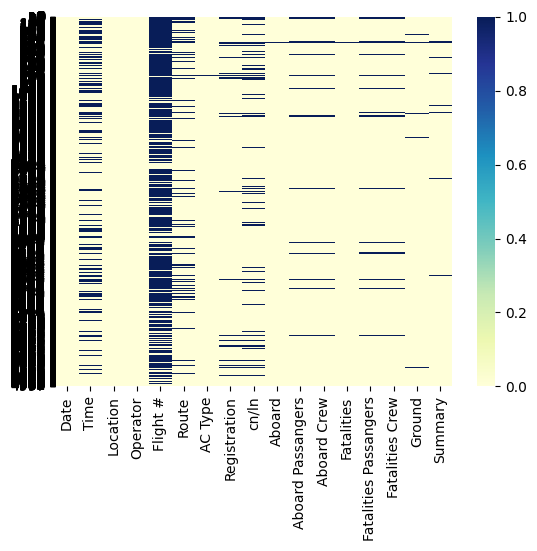

In [11]:
df.info()
import seaborn as sns
sns.heatmap(df.isnull(), cbar=True, 
            yticklabels=True, 
            cmap='YlGnBu') 

In [12]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing values
df = df.dropna(subset=['Date', 'Fatalities', 'Aboard'])  # Essential columns
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival_Rate'] = df['Survivors'] / df['Aboard']

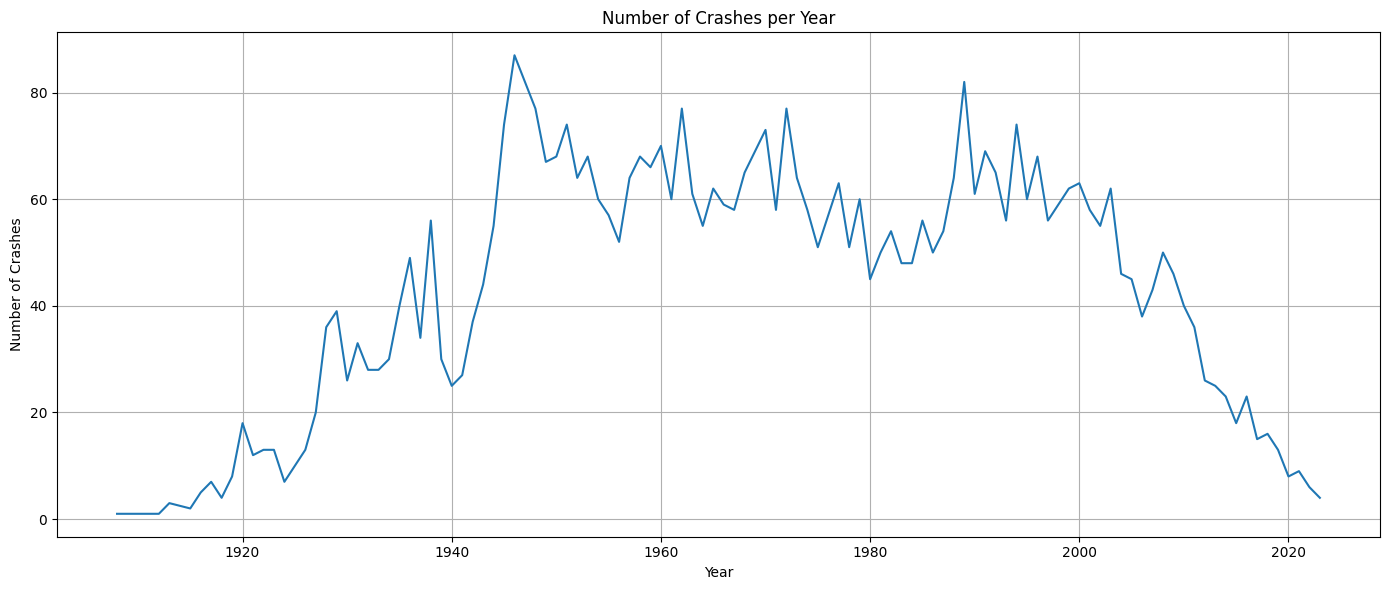

In [13]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing values
df = df.dropna(subset=['Date', 'Fatalities', 'Aboard'])  # Essential columns
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival_Rate'] = df['Survivors'] / df['Aboard']

# Crashes per year
df['Year'] = df['Date'].dt.year
crashes_per_year = df['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt

# Plot crashes over time
plt.figure(figsize=(14,6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.tight_layout()
plt.show()



        Fatalities  Survival_Rate
count  4980.000000    4975.000000
mean     22.401807       0.181489
std      35.089616       0.311724
min       0.000000       0.000000
25%       4.000000       0.000000
50%      11.000000       0.000000
75%      25.000000       0.250000
max     583.000000       1.000000
T-statistic: 1.420, P-value: 0.1564


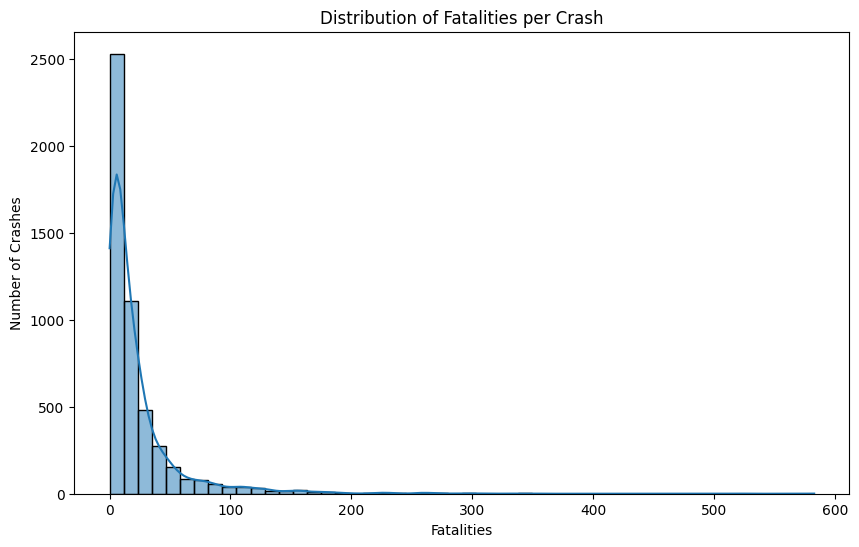

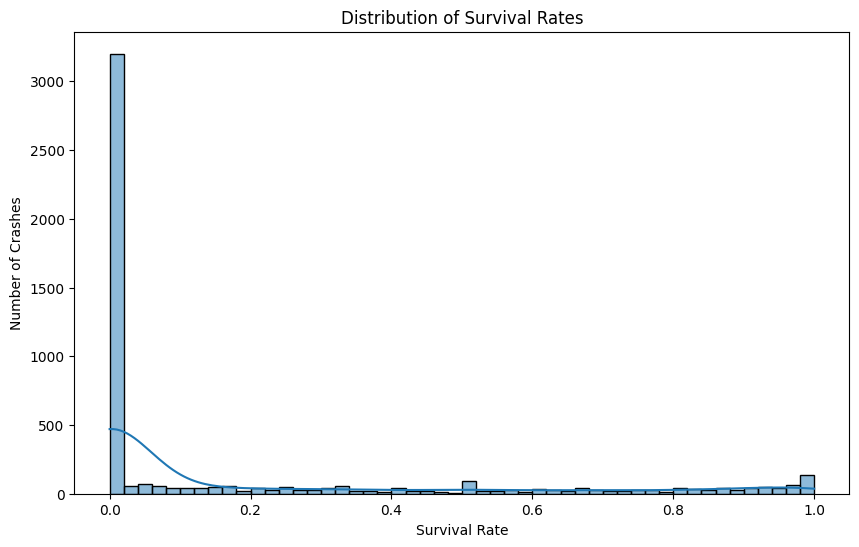

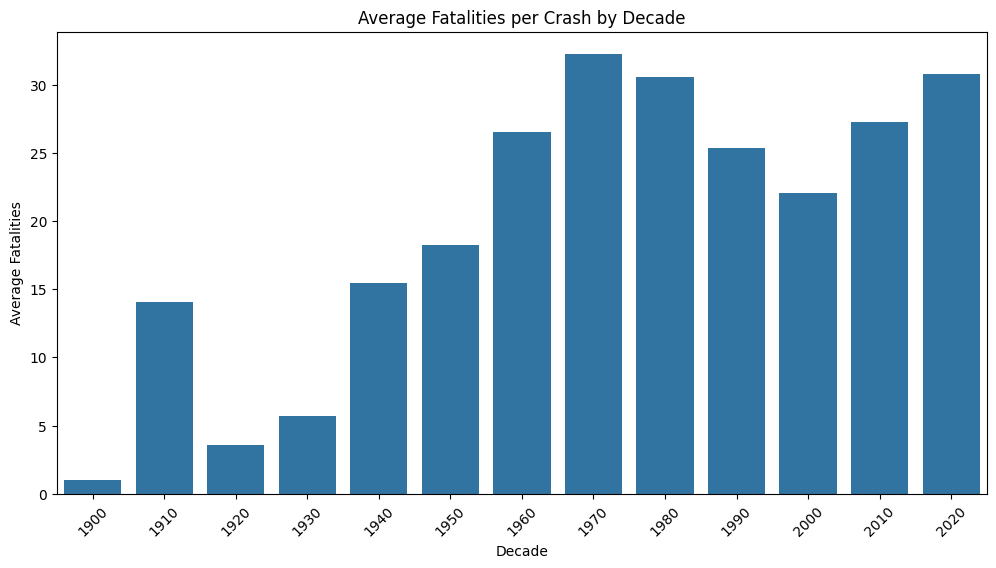

In [14]:
#Statistical Analysis
# Descriptive statistics

# Hypothesis Test: Compare fatalities between decades
df['Decade'] = (df['Year'] // 10) * 10
decade_fatalities = df.groupby('Decade')['Fatalities'].mean()

print(df[['Fatalities', 'Survival_Rate']].describe())

# Example: Compare 1970s and 2010s
group1 = df[df['Decade'] == 1970]['Fatalities']
group2 = df[df['Decade'] == 2010]['Fatalities']

# T-test (unequal variance)
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

#Visualizations
# Fatalities Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Fatalities'], bins=50, kde=True)
plt.title("Distribution of Fatalities per Crash")
plt.xlabel("Fatalities")
plt.ylabel("Number of Crashes")
plt.show()

# Survival Rate Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Survival_Rate'], bins=50, kde=True)
plt.title("Distribution of Survival Rates")
plt.xlabel("Survival Rate")
plt.ylabel("Number of Crashes")
plt.show()

# Crashes by decade
plt.figure(figsize=(12,6))
sns.barplot(x=decade_fatalities.index, y=decade_fatalities.values)
plt.title("Average Fatalities per Crash by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Fatalities")
plt.xticks(rotation=45)
plt.show()

#Insight and Report Summary
## Summary of Insights:

#- **Crashes Over Time**: The number of crashes peaked during the mid-20th century and declined significantly in recent decades, suggesting improvements in aviation safety.
#- **Fatality Trends**: Average fatalities per crash were higher in earlier decades and have decreased in recent years.
#- **Survival Rates**: Overall survival rates have improved over time, with more modern crashes showing higher likelihood of survivors.
#- **Hypothesis Testing**: A t-test comparing the 1970s to the 2010s showed a significant difference in average fatalities, reinforcing the trend of improved safety.
